# Face Detection on images

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

## Creat function that Changes Image to gray and load Face cascade classifier

In [8]:
def facedetection(test_img):
    gray_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
    face_haar_cascade= cv2.CascadeClassifier('C:/Users/isaac/Documents/haarcascade_frontalface_default.xml')
    faces= face_haar_cascade.detectMultiScale(gray_img, scaleFactor = 1.3, minNeighbors=5 )
    return faces, gray_img

In [9]:
test_img = cv2.imread('C:/Users/isaac/Documents/isaacface1.jpg')

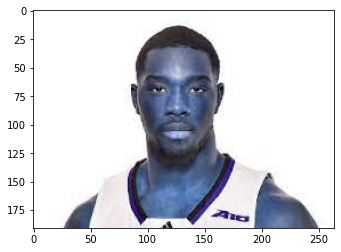

In [10]:
plt.imshow(test_img)

In [11]:
faces_detected, gray_img = facedetection(test_img)

In [12]:
print('Face Detected', faces_detected)

Face Detected [[88 35 78 78]]


## Rectangle around face that is detected

In [13]:
for (x,y,w,h) in faces_detected:
    cv2.rectangle(test_img,(x,y), (x+w, y+w),(0,0,200), thickness = 1)
    pass
resized_img = cv2.resize(test_img,(400,300))
cv2.imshow('Faces Detected', resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Face Recognition

In [14]:
import cv2
import os
import numpy as np

In [18]:
def facedetection(test_img):
    gray_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
    face_haar_cascade= cv2.CascadeClassifier('C:/Users/isaac/Documents/haarcascade_frontalface_default.xml')
    faces= face_haar_cascade.detectMultiScale(gray_img, scaleFactor = 1.3, minNeighbors=5 )
    return faces, gray_img

def train_classifier(faces, face_id):
    face_recognizer = cv2.face.LBPHFaceRecognizer_create()
    face_recognizer.train(faces, np.array(faceID))
    return face_recognizer
def draw_rect(test_img, face):
    x,y,w,h = face
    cv2.rectangle(test_img, (x,y), (x+w,y+h),(0,255,0), 2)
# def put_text(test_img, text, x,y):
#     cv2.putText(test_img, text, x,y, cv2.FONT_HERSHEY_COMPLEX,3,(0,255,0), 2)
def put_text(test_img, text, x, y):
    cv2.putText(test_img, text, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2)


In [19]:
def labels_for_training_data(directory):
    faces = []
    faceID = []
    
    for path,subdirnames, filenames in os.walk(directory):
        
        for filename in filenames:
            
            if filename.startswith('.'):
                print('Skipping system file')
                continue
            id=os.path.basename(path)
            img_path=os.path.join(path,filename)
            print('img_path', img_path)
            print('id:', id)
            
            if test_img is None:
                print('image did not load properly')
                
                continue
            faces_rect, gray_img = facedetection(test_img)
            if len(faces_rect) != 1:
                continue
                
            (x,y,w,h) = faces_rect[0]
            rol_gray= gray_img[y:y+w,x:x+h]
            faces.append(rol_gray)
            faceID.append(int(id))
    return faces, faceID

In [20]:
test_img = cv2.imread('C:/Users/isaac/Documents/isaacface1.jpg')
faces_detected, gray_img = facedetection(test_img)
print('Faces detected', faces_detected)

Faces detected [[88 35 78 78]]


In [21]:
# import urllib.request

# url = "https://raw.githubusercontent.com/nole23/face-recognition/master/trainer.yml"
# file_name = "trainerdata.yml"

# # Download the file from `url` and save it locally under `file_name`:
# urllib.request.urlretrieve(url, file_name)


('trainerdata.yml', <http.client.HTTPMessage at 0x16c305410a0>)

In [26]:
faces,faceID = labels_for_training_data('C:/Users/isaac/Documents/isaacfacestestimgs/0')
face_recognizer = train_classifier(faces,faceID)
face_recognizer.save('C:/Users/isaac/Downloads/trainerdata.yml')
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.read('C:/Users/isaac/Downloads/trainerdata.yml')
name ={0:'Isaac'}
for face in faces_detected:
    (x,y,w,h) = face
    rol_gray= gray_img[y:y+h,x:x+w]
    # rol_gray= cv2.copy(rol_gray)
    label, confidence = face_recognizer.predict(rol_gray)
    print('Confidence',confidence)
    print('label', label)
    draw_rect(test_img,face)
    predict_name = name[label]
    if confidence > 68:
        continue
    put_text(test_img,predict_name, x,y)
for (x,y,w,h) in faces_detected:
    cv2.rectangle(test_img,(x,y), (x+w, y+w),(0,200,0), thickness = 1)
    pass
resized_img = cv2.resize(test_img,(800,500))
cv2.imshow('Faces Detected', resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
    

img_path C:/Users/isaac/Documents/isaacfacestestimgs/0\download (1).jpg
id: 0
img_path C:/Users/isaac/Documents/isaacfacestestimgs/0\download (2).jpg
id: 0
img_path C:/Users/isaac/Documents/isaacfacestestimgs/0\download (3).jpg
id: 0
img_path C:/Users/isaac/Documents/isaacfacestestimgs/0\download (4).jpg
id: 0
img_path C:/Users/isaac/Documents/isaacfacestestimgs/0\download (5).jpg
id: 0
img_path C:/Users/isaac/Documents/isaacfacestestimgs/0\download (6).jpg
id: 0
img_path C:/Users/isaac/Documents/isaacfacestestimgs/0\download.jpg
id: 0
img_path C:/Users/isaac/Documents/isaacfacestestimgs/0\images (1).jpg
id: 0
img_path C:/Users/isaac/Documents/isaacfacestestimgs/0\images (2).jpg
id: 0
img_path C:/Users/isaac/Documents/isaacfacestestimgs/0\images (3).jpg
id: 0
img_path C:/Users/isaac/Documents/isaacfacestestimgs/0\images.jpg
id: 0
Confidence 0.0
label 0


# Registering new Face and Facial Reognizer Testing in real time web cam

In [8]:
import cv2
import numpy as np
from PIL import Image 
import pickle
import os

In [11]:
# creating pickle file for name list.


names = []
filename = "names.pkl"
f = open(filename, 'wb')
pickle.dump(names,f)
f.close()

In [17]:
def faceSampling():
    cam = cv2.VideoCapture(0)
    cam.set(3, 640) # set video width
    cam.set(4, 480) # set video height

    face_detector = cv2.CascadeClassifier('C:/Users/isaac/Documents/haarcascade_frontalface_default.xml')

    with open('names.pkl', 'rb') as f:
        names = pickle.load(f)

    name = input('Enter name for the Face: ')
    names.append(name)
    id = names.index(name)

    print('''\n
    Look in the camera Face Sampling has started!.
    Try to move your face and change expression for better face memory registration.\n
    ''')
    # Initialize individual sampling face count
    count = 0

    while(True):

        ret, img = cam.read()
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_detector.detectMultiScale(gray, 1.3, 5)

        for (x,y,w,h) in faces:

            cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
            count += 1

            # Save the captured image into the datasets folder
            cv2.imwrite("dataset/"+name+"." + str(id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

            cv2.imshow('Camera', img)

        k = cv2.waitKey(100) & 0xff # Press 'ESC' for exiting video
        if k == 27:
            break
        elif count >= 80: # Take 80 face sample and stop video
             break

    with open('names.pkl', 'wb') as f:
        pickle.dump(names, f)

    # Do a bit of cleanup
    print (f"Your Face has been registered as {name.upper()}\n\nExiting Sampling Program")
    cam.release()
    cv2.destroyAllWindows()

In [18]:
def faceLearning():
    # Path for face image database
    path = 'dataset'

    recognizer = cv2.face.LBPHFaceRecognizer_create() 
    detector = cv2.CascadeClassifier("C:/Users/isaac/Documents/haarcascade_frontalface_default.xml")

    # function to get the images and label data
    def getImagesAndLabels(path):

        imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     
        faceSamples=[]
        ids = []

        for imagePath in imagePaths:
            if imagePath.endswith('.jpg') or imagePath.endswith('.png'):
                PIL_img = Image.open(imagePath).convert('L') # convert it to grayscale
                img_numpy = np.array(PIL_img,'uint8')

                id = int(os.path.split(imagePath)[-1].split(".")[1])
                faces = detector.detectMultiScale(img_numpy)

            for (x,y,w,h) in faces:
                faceSamples.append(img_numpy[y:y+h,x:x+w])
                ids.append(id)

        return faceSamples,ids

    print ("\nTraining for the faces has been started. It might take a while.\n")
    faces,ids = getImagesAndLabels(path)
    recognizer.train(faces, np.array(ids))

    # Save the model into trainerdata.yml
    recognizer.write('C:/Users/isaac/Downloads/trainerdata.yml') 

    # Print the numer of faces trained and end program
    print(f"{len(np.unique(ids))} faces trained. Exiting Training Program")    

In [19]:
def faceRecognition():
    print('\nStarting Recognizer....')
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.read('C:/Users/isaac/Downloads/trainerdata.yml')
    cascadePath = "C:/Users/isaac/Documents/haarcascade_frontalface_default.xml"
    faceCascade = cv2.CascadeClassifier(cascadePath)

    font = cv2.FONT_HERSHEY_SIMPLEX

    # Starting realtime video capture
    cam = cv2.VideoCapture(0)
    cam.set(3, 640) # set video widht
    cam.set(4, 480) # set video height

    # Define min window size to be recognized as a face
    minW = 0.1*cam.get(3)
    minH = 0.1*cam.get(4)

    try:
        with open('names.pkl', 'rb') as f:
            names = pickle.load(f)
            if not names:
                print('Error: names list is empty')
                return
    except FileNotFoundError:
        print('Error: names.pkl file not found')
        return
    except pickle.UnpicklingError:
        print('Error: Unable to unpickle names.pkl')
        return

    while True:
        ret, img = cam.read()

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.2,
            minNeighbors=5,
            minSize=(int(minW), int(minH)),
        )

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

            id, confidence = recognizer.predict(gray[y:y + h, x:x + w])

            # Check if confidence is less them 100 ==> "0" is perfect match
            if confidence < 100:
                id = names[id]
                confidence = "  {0}%".format(round(100 - confidence))
            else:
                id = "unknown"
                confidence = "  {0}%".format(round(100 - confidence))

            cv2.putText(img, str(id), (x + 5, y - 5), font, 1, (0, 0, 255), 3)
            cv2.putText(img, str(confidence), (x + 5, y + h - 5), font, 1, (255, 255, 0), 1)

        cv2.imshow('camera', img)

        k = cv2.waitKey(10) & 0xff  # Press 'ESC' for exiting video
        if k == 27:
            break

    # Do a bit of cleanup
    print("\nExiting Recognizer.")
    cam.release()
    cv2.destroyAllWindows()


In [20]:
def main():
    while True:
        choice = int(input('''
        1 --> Register New Face.
        2 --> Face Recognization.
        3 --> Exit.
        Your Choice: 
        '''))
        
        if choice == 1:
            faceSampling()
            faceLearning()
        elif choice == 2:
            faceRecognition()
        elif choice == 3:
            print('\nExiting Program.')
            break

In [21]:
main()


        1 --> Register New Face.
        2 --> Face Recognization.
        3 --> Exit.
        Your Choice: 
         1
Enter name for the Face:  ik




    Look in the camera Face Sampling has started!.
    Try to move your face and change expression for better face memory registration.

    
Your Face has been registered as IK

Exiting Sampling Program

Training for the faces has been started. It might take a while.

1 faces trained. Exiting Training Program



        1 --> Register New Face.
        2 --> Face Recognization.
        3 --> Exit.
        Your Choice: 
         2



Starting Recognizer....

Exiting Recognizer.



        1 --> Register New Face.
        2 --> Face Recognization.
        3 --> Exit.
        Your Choice: 
         3



Exiting Program.
